In [12]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
from scipy.linalg import eigh
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('./../../Datasets/MNIST_Digit/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
partition = 15000
X = df.values[:partition, 1:]
Y_true = df.values[:partition, 0]
print(X.shape, Y_true.shape)

(15000, 784) (15000,)


In [15]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
print(standardized_data.shape)

(15000, 784)


In [16]:
covar_matrix = np.matmul(standardized_data.T, standardized_data)
print(covar_matrix.shape)

(784, 784)


In [17]:
values, vectors = eigh(covar_matrix, eigvals=(782,  783))
print(vectors.shape)

(784, 2)


In [18]:
vectors = vectors.T
print(vectors.shape)

(2, 784)


In [19]:
reduce_data = np.matmul(vectors, standardized_data.T)
print(reduce_data.shape, Y_true.shape)

(2, 15000) (15000,)


In [20]:
data = np.vstack((reduce_data, Y_true)).T
reduce_df = pd.DataFrame(data, columns=('PC1', 'PC2', 'Class'))
reduce_df.head()

,PC1,PC2,Class
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


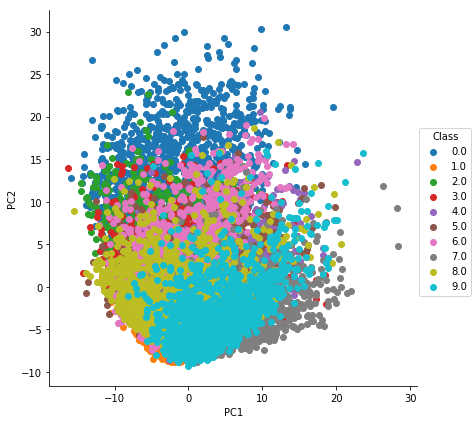

In [25]:
sn.FacetGrid(reduce_df, hue="Class", size=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()